In [1]:
#First, import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
titanic_df = pd.read_csv("./Titanic datasets/train.csv")

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Get an overview of all the data
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


All good data analysis projects begin with trying to answer questions. Now that we know what column category data we have let's think of some questions or insights we would like to obtain from the data. So here's a list of questions we'll try to answer using our new data analysis skills!

First some basic questions:

1.) Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)

2.) What deck were the passengers on and how does that relate to their class?

3.) Where did the passengers come from?

4.) Who was alone and who was with family?

Then we'll dig deeper, with a broader question:

5.) What factors helped someone survive the sinking?

1.) Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)

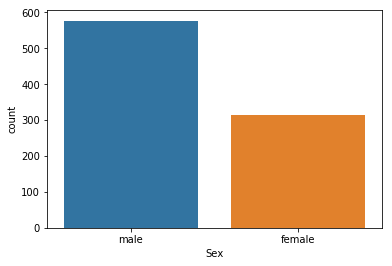

In [5]:
#Gender first
sns.countplot('Sex',data = titanic_df)

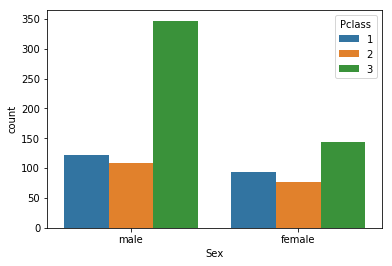

In [6]:
# Now let's seperate the genders by classes with the 'hue' arguement here!
sns.countplot('Sex',data = titanic_df, hue = 'Pclass')

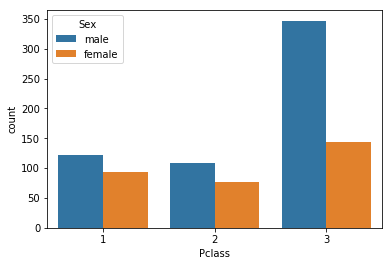

In [7]:
sns.countplot('Pclass',data = titanic_df, hue = 'Sex')

In [8]:
# We'll treat anyone as under 16 as a child, and then use the apply technique with a function to create a new column
def male_female_age(passenger):
    age,sex = passenger
    if age < 16:
        return 'child'
    else:
        return sex

titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_age,axis = 1)

In [9]:
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


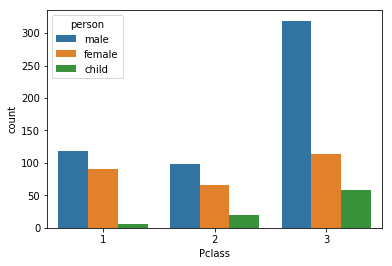

In [10]:
#Plot the classes by 
sns.countplot('Pclass',data=titanic_df,hue='person')

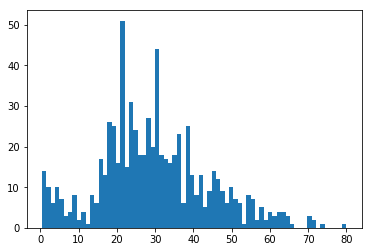

In [11]:
#Age distribution using panda
titanic_df['Age'].hist(bins=70,grid = False)

In [12]:
#Overview of the distribution of female,male and child
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

In [13]:
#To have it in %
titanic_df['person'].value_counts() / len(titanic_df) * 100

male      60.269360
female    30.415264
child      9.315376
Name: person, dtype: float64

/home/alex/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


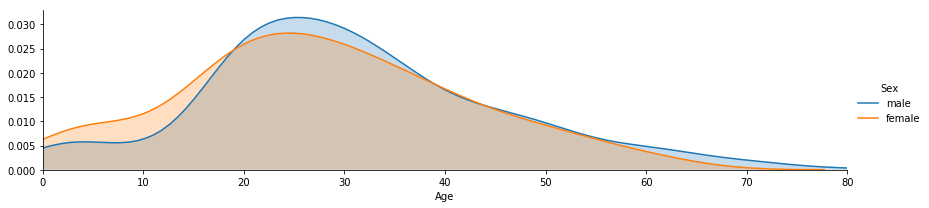

In [14]:
#Distribution of Sex by age

#Set the figure equal to a facetgrid with the pandas dataframe as its data source, set the hue, and change the aspect ratio.
fig = sns.FacetGrid(data=titanic_df,hue='Sex',aspect=4)

# Next use map to plot all the possible kdeplots for the 'Age' column by the hue choice
fig.map(sns.kdeplot,'Age',shade = True)

# Set the x max limit by the oldest passenger
oldest = titanic_df['Age'].max()

#Since we know no one can be negative years old set the x lower limit at 0
fig.set(xlim = (0,oldest))

#Finally add a legend
fig.add_legend()

/home/alex/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


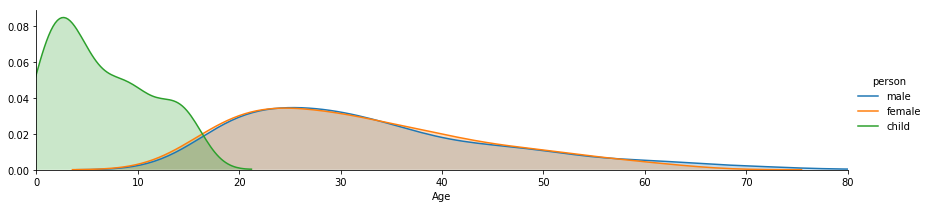

In [15]:
#Including the children with the hue='person'

fig = sns.FacetGrid(data=titanic_df,hue='person',aspect=4)
fig.map(sns.kdeplot,'Age',shade = True)
oldest = titanic_df['Age'].max()
fig.set(xlim = (0,oldest))
fig.add_legend()

/home/alex/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


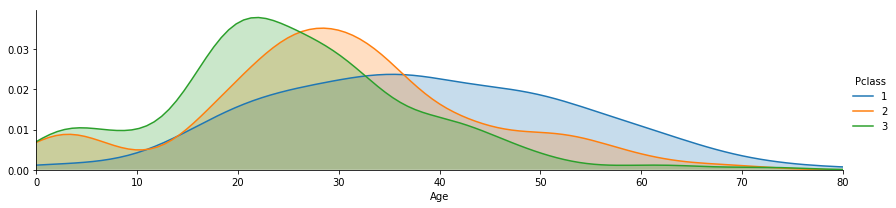

In [16]:
#Looking at the classes with the hue='Pclass'

fig = sns.FacetGrid(data=titanic_df,hue='Pclass',aspect=4)
fig.map(sns.kdeplot,'Age',shade = True)
oldest = titanic_df['Age'].max()
fig.set(xlim = (0,oldest))
fig.add_legend()

2.) What deck were the passengers on and how does that relate to their class?

In [17]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [18]:
deck = titanic_df['Cabin'].dropna()

In [19]:
deck.shape

(204,)

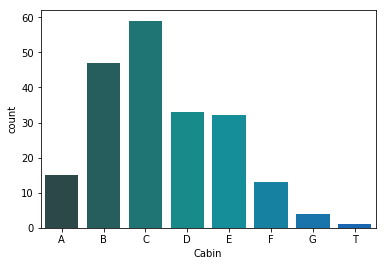

In [20]:
#Since we only need the first letter for the Cabin, let's grab it

#Creating an empty list
levels = []

#Loop to grab all the first letter
for level in deck:
    levels.append(level[0])
    
#Sorting the letters
levels.sort()

#Creating a Dataframe with the empty list
cabin_df = pd.DataFrame(levels)
cabin_df.columns = ['Cabin']

#Plotting it
sns.countplot('Cabin',data=cabin_df,palette='winter_d')

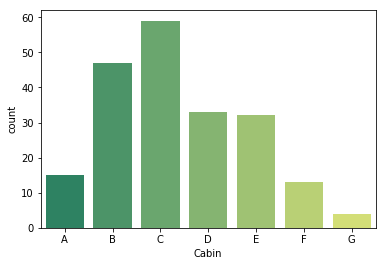

In [21]:
#Since the T value doesn't make any sense, we drop it
cabin_df = cabin_df[cabin_df['Cabin'] != 'T']
sns.countplot('Cabin',data=cabin_df,palette='summer')

For all the palette colors, check https://matplotlib.org/users/colormaps.html

3.) Where did the passengers come from?

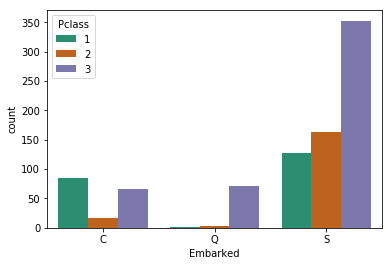

In [22]:
#Plot where they did come from and in which class they went in
sns.countplot('Embarked',data=titanic_df,hue='Pclass',palette='Dark2',order=['C','Q','S'])

4.) Who was alone and who was with family?

In [23]:
#Let's create a new column to see who was alone and who wasn't
titanic_df['Alone'] = titanic_df['SibSp'] + titanic_df['Parch']

In [24]:
titanic_df['Alone'].loc[titanic_df['Alone'] > 0 ] = 'With family' 
titanic_df['Alone'].loc[titanic_df['Alone'] == 0 ] = 'Alone' 

/home/alex/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [25]:
titanic_df['Alone'].value_counts() / len(titanic_df) * 100

Alone          60.26936
With family    39.73064
Name: Alone, dtype: float64

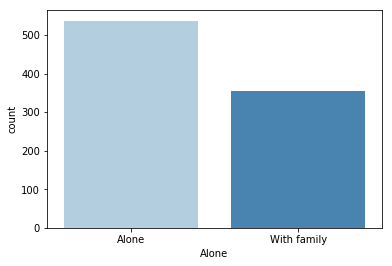

In [26]:
sns.countplot('Alone',data=titanic_df,palette='Blues',order=['Alone','With family'])

5.) What factors helped someone survive the sinking?

In [27]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


In [28]:
titanic_df['Survivor'] = titanic_df['Survived'].map({0:'No',1:'yes'})

No     61.616162
yes    38.383838
Name: Survivor, dtype: float64

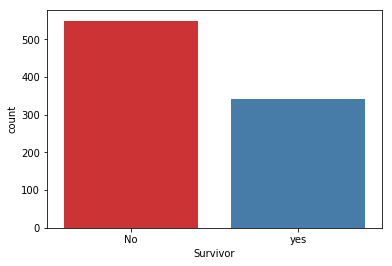

In [29]:
sns.countplot('Survivor',data = titanic_df, palette = 'Set1')
titanic_df['Survivor'].value_counts() / len(titanic_df) * 100

/home/alex/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


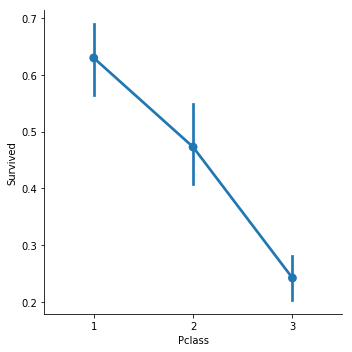

In [30]:
#Let's see if the class had an effect on the survival rate
sns.catplot('Pclass','Survived',data=titanic_df,kind = 'point')

/home/alex/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


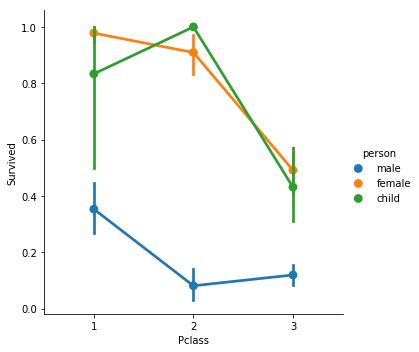

In [31]:
#Let's see if the class and the gender had an effect on the survival rate 
sns.catplot('Pclass','Survived',data=titanic_df,hue = 'person',kind = 'point')

/home/alex/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


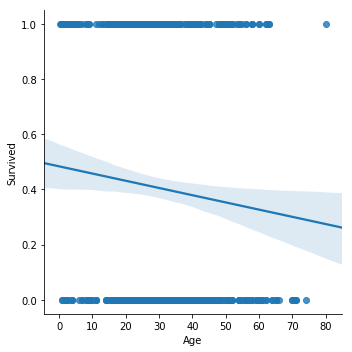

In [32]:
#Let's see if the Age had an effect
sns.lmplot('Age','Survived',data = titanic_df)

/home/alex/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


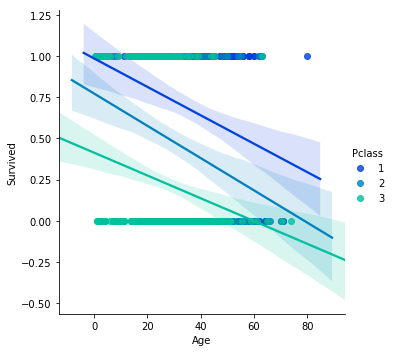

In [33]:
#Let's see if the Age and the class had an effect
sns.lmplot('Age','Survived',data = titanic_df,hue = 'Pclass',palette='winter')

/home/alex/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


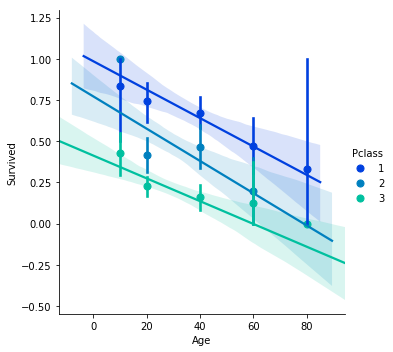

In [34]:
#Let's bin the age to have a cleaner view
generation = [10,20,40,60,80]
sns.lmplot('Age','Survived',data = titanic_df,hue = 'Pclass',palette='winter',x_bins=generation)

/home/alex/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


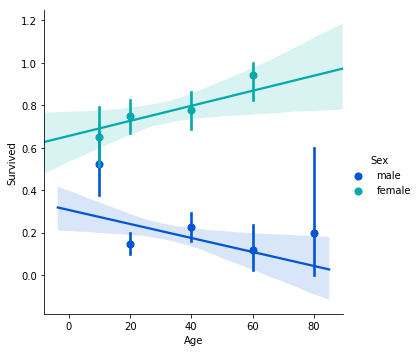

In [35]:
#And the sex ?
sns.lmplot('Age','Survived',data = titanic_df,hue = 'Sex',palette='winter',x_bins=generation)

Bonus question

1.) Did the deck have an effect on the passengers survival rate? Did this answer match up with your intuition?

2.) Did having a family member increase the odds of surviving the crash?

1.) Did the deck have an effect on the passengers survival rate? Did this answer match up with your intuition?

In [36]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With family,No
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,No


In [37]:
titanic_df_deck = titanic_df.dropna()

In [38]:
titanic_df_deck['Deck'] = titanic_df_deck['Cabin'].str[0]

/home/alex/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [39]:
titanic_df_deck = titanic_df_deck.loc[titanic_df_deck['Cabin'] != 'T']

/home/alex/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


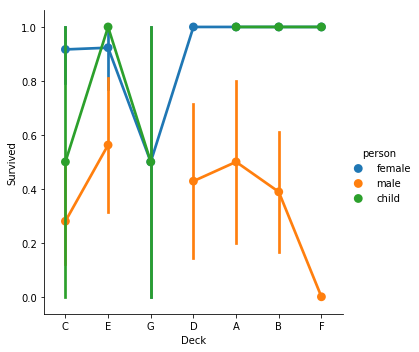

In [40]:
sns.catplot('Deck','Survived',data=titanic_df_deck,hue = 'person',kind = 'point')

2.) Did having a family member increase the odds of surviving the crash?

/home/alex/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


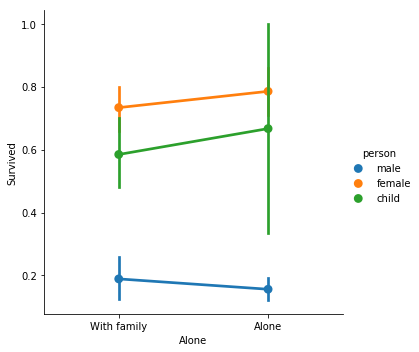

In [41]:
sns.catplot('Alone','Survived',data=titanic_df,hue = 'person',kind = 'point')